In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [50]:
#load the model
model = tf.keras.models.load_model('trained_model.keras')

In [ ]:
model.summary() #summary of the model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

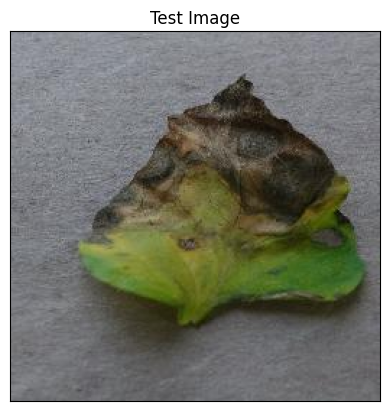

In [76]:
#visualizing image of our test set
image_path = r"\Plant_leaf_disease\dataset_split\test\TomatoEarlyBlight2.JPG"
img = cv2.imread(image_path) #read image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert BGR to RGB

#displaying the image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title("Test Image")
plt.show()

In [66]:
#testing model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=[128,128])
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [67]:
prediction = model.predict(input_arr)
prediction , prediction.shape

1/1 [==============================] - 0s 16ms/step


(array([[1.52679070e-06, 1.08308576e-07, 1.27241208e-07, 2.53716589e-05,
         5.96657279e-04, 4.49074244e-09, 1.13936525e-11, 7.80949261e-09,
         1.33644917e-09, 5.57224666e-09, 4.28675584e-09, 4.03499655e-07,
         2.43414178e-07, 4.03092865e-10, 4.86580447e-08, 9.88116033e-10,
         2.72151806e-06, 8.73472517e-10, 3.52298080e-10, 1.46952714e-10,
         1.20274057e-09, 1.16167053e-06, 2.59561236e-14, 3.52815860e-10,
         1.26753730e-09, 6.47771871e-04, 3.12273223e-05, 5.81901190e-07,
         3.73231342e-05, 9.65368807e-01, 1.14597529e-02, 1.58626342e-03,
         1.15027521e-02, 3.74639436e-04, 4.95652012e-06, 4.01181325e-07,
         7.83749390e-03, 5.19663328e-04]], dtype=float32),
 (1, 38))

In [68]:
result_index=np.argmax(prediction)
result_index

29

In [69]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

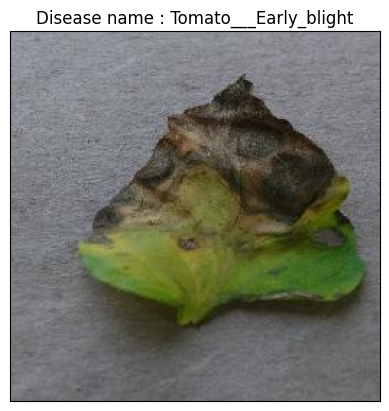

In [75]:
#displaying result
model_prediction = class_name[result_index]
plt.imshow(img)
#displaying the image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(f"Disease name : {model_prediction}")
plt.show()

In [71]:
model_prediction

'Tomato___Early_blight'